# Pandas

`pandas` 是一个 `Python Data Analysis Library`。

安装请参考官网的教程，如果安装了 `Anaconda`，则不需要安装 `pandas` 库。

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import pandas as pd
from pandas import DataFrame, Series
path = 'input_data/shanghai_cxj_store_header_with_baidupoi.csv'

`pandas` 中有三种基本结构：

- `Series`
    - 1D labeled homogeneously-typed array
- `DataFrame`
    - General 2D labeled, size-mutable tabular structure with potentially heterogeneously-typed columns
- `Panel`
    - General 3D labeled, also size-mutable array

## Series

`Series` 是一维带标记的数组结构，可以存储任意类型的数据（整数，浮点数，字符串，`Python` 对象等等）。

作为一维结构，它的索引叫做 `index`，基本调用方法为

    s = pd.Series(data, index=index)
    
其中，`data` 可以是以下结构：

- 字典
- `ndarray`
- 标量，例如 `5`

`index` 是一维坐标轴的索引列表。

### 生成Series

In [36]:
# 从 ndarray 构建
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

s

a   -1.716215
b    0.094958
c   -1.076652
d   -0.594885
e   -0.672394
dtype: float64

如果 `data` 是个 `ndarray`，那么 `index` 的长度必须跟 `data` 一致：

一维 `Series` 可以用一维列表初始化：

In [4]:
# series的值和index
obj = Series([4, 7, -5, 3])
print(obj.values)
print(obj.index)

[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [5]:
# 分别以 value 和 index 传数据
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [6]:
# 字典传入
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [7]:
# 当字典和index同时出现，index为准
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

### 索引

In [8]:
obj2['d'] = 6
obj2

d    6
b    7
a   -5
c    3
dtype: int64

In [9]:
obj2[['c', 'a', 'd']]

c    3
a   -5
d    6
dtype: int64

In [10]:
obj2[obj2>0]

d    6
b    7
c    3
dtype: int64

In [11]:
'b' in obj2

True

In [50]:
# 通过标签的索引和数字索引是不同的，前者是闭区间，包含末端
print(obj['b':'c'])
print(obj[1:2])

b    1.0
c    2.0
dtype: float64
b    1.0
dtype: float64


### 层次化索引

In [154]:
# 层次化index
data = Series(np.random.randn(10), index = [list('aaabbbccdd'), [1,2,3,1,2,3,1,2,2,3]])
data

a  1    0.673418
   2    0.028812
   3    0.354546
b  1    0.099886
   2    0.122100
   3   -0.722858
c  1    0.410979
   2    1.508125
d  2    0.694343
   3   -0.689825
dtype: float64

In [158]:
# 展平
data.unstack()

,1,2,3
a,0.673418,0.028812,0.354546
b,0.099886,0.122100,-0.722858
c,0.410979,1.508125,NaN
d,NaN,0.694343,-0.689825


In [155]:
list(data.index)

[('a', 1),
 ('a', 2),
 ('a', 3),
 ('b', 1),
 ('b', 2),
 ('b', 3),
 ('c', 1),
 ('c', 2),
 ('d', 2),
 ('d', 3)]

In [156]:
data['b']

1    0.099886
2    0.122100
3   -0.722858
dtype: float64

In [157]:
data[:,2]

a    0.028812
b    0.122100
c    1.508125
d    0.694343
dtype: float64

### name

In [12]:
obj4.name = 'population'
obj4.index.name = 'state'
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

### 重命名与填充值

In [13]:
obj2 = obj.reindex([i for i in 'abcde'], fill_value = 0)
obj2

a    0
b    0
c    0
d    0
e    0
dtype: int64

In [14]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0,2,4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [15]:
# 重命名与填充
obj3.reindex(range(7), method = 'bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
6       NaN
dtype: object

### 计算

In [16]:
obj2*2

a    0
b    0
c    0
d    0
e    0
dtype: int64

In [17]:
obj3 + obj4

0             NaN
2             NaN
4             NaN
California    NaN
Ohio          NaN
Oregon        NaN
Texas         NaN
dtype: object

### null的判断与索引

In [132]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [19]:
# 判断
print(pd.isnull(obj4))
print(pd.notnull(obj4))

state
California     True
Ohio          False
Oregon        False
Texas         False
Name: population, dtype: bool
state
California    False
Ohio           True
Oregon         True
Texas          True
Name: population, dtype: bool


In [20]:
# 索引
print(obj4[obj4.isnull()])
print(obj4[obj4.notnull()])

state
California   NaN
Name: population, dtype: float64
state
Ohio      35000.0
Oregon    16000.0
Texas     71000.0
Name: population, dtype: float64


In [133]:
mask = obj4.isin([35000])
print(mask)
print('----------------------------')
print(obj4[mask])

state
California    False
Ohio           True
Oregon        False
Texas         False
Name: population, dtype: bool
----------------------------
state
Ohio    35000.0
Name: population, dtype: float64


### 元素删除

In [21]:
obj =  Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj.drop(['d','c'])

a    0.0
b    1.0
e    4.0
dtype: float64

### 排序

In [111]:
obj = Series(range(4), index=list('dabc'))
obj

d    0
a    1
b    2
c    3
dtype: int64

In [117]:
# 按照index排序
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [118]:
# 按照value排序
obj = Series([4, 7, -3, 2])
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [119]:
Series([4, np.nan, np.nan, -3, 2]).sort_values()

3   -3.0
4    2.0
0    4.0
1    NaN
2    NaN
dtype: float64

`rank`函数:rank表示在这个数在原来的Series中排第几名，有相同的数，取其排名平均（默认）作为值。

In [125]:
obj = Series([7, -5, 7, 4,2,0,4])
# method = average
print('------method = average----------------------')
print(obj.rank())
print('------method = first----------------------')
print(obj.rank(method = 'first'))
print('-------method = max and ascending=false---------------------')
print(obj.rank(ascending=False, method='max'))
print('--------method = min--------------------')
print(obj.rank(method = 'min'))

------method = average----------------------
0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64
------method = first----------------------
0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64
-------method = max and ascending=false---------------------
0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64
--------method = min--------------------
0    6.0
1    1.0
2    6.0
3    4.0
4    3.0
5    2.0
6    4.0
dtype: float64


### 汇总统计

In [130]:
#唯一值、值计数和成员资格
obj = Series(list('cadaabbcc'))
unique = obj.unique()
print(unique)
print('----------------------------')
print(obj.value_counts())
print('----------------------------')
print(pd.value_counts(obj.values, sort=False))

['c' 'a' 'd' 'b']
----------------------------
a    3
c    3
b    2
d    1
dtype: int64
----------------------------
c    3
a    3
d    1
b    2
dtype: int64


### 处理缺失数据

In [134]:
string_data = Series(['a', 'b', np.nan, 'c'])
string_data

0      a
1      b
2    NaN
3      c
dtype: object

In [135]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [138]:
string_data[string_data.notnull()]

1    b
3    c
dtype: object

In [137]:
# None 和 NaN 两种类型不同
string_data[0] = None
string_data.isnull()
print('----------------------------')
print(type(string_data[0]), type(string_data[2]))

----------------------------
<class 'NoneType'> <class 'float'>


### 对Series的concat

In [203]:
# concat
s1 = Series([0,1], index=['a', 'b'])
s2 = Series([2,3,4], index=['c', 'd', 'e'])
s3 = Series([5,6], index=['f', 'g'])
# 默认是axis=0
pd.concat([s1,s2,s3])
# 默认join是outer
print(pd.concat([s1,s2,s3],axis=1,sort=False))
# 加列名
pd.concat([s1,s2,s3], axis=1,keys=['one', 'two','three'],sort=False)

     0    1    2
a  0.0  NaN  NaN
b  1.0  NaN  NaN
c  NaN  2.0  NaN
d  NaN  3.0  NaN
e  NaN  4.0  NaN
f  NaN  NaN  5.0
g  NaN  NaN  6.0


,one,two,three
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


### replace

In [213]:
# 替换值
data = Series([1, -999, 2, -999, -1000,3])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: int64

In [214]:
# 替换成固定值
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

In [215]:
# 对选择的值进行固定值替换
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

In [216]:
# 按照list对应关系或者字典进行替换（fillna也有按照字典填充的属性）
print(data.replace([-999, -1000], [np.nan, 0]))
print(data.replace({-999:np.nan,  -1000:0}))

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64
0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64


## DataFrame

### 存取数据

**read_csv&to_csv**

In [30]:
# sep确定分隔符
df = pd.read_csv(path,sep=',')
df.iloc[0:2]

,Unnamed: 0,store_id_in_org,store_no,store_name,store_address,store_type,short_code_prefix,open_status,x_axis,y_axis,city_id,dist_id,baidu_lat,baidu_lng,precise,confidence,comprehension
0,0,11.0,103.0,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.29899,310100,310110,31.304924,121.497895,1,80,100
1,1,13.0,13.0,上海福泉店,上海长宁区新潮路35号,Community,C,2,121.3609,31.20149,310100,310105,31.207286,121.367523,1,80,100


In [23]:
# header=None意味着没有列名
df1 = pd.read_csv(path, header=None)
df1.iloc[0:2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,Unnamed: 0,store_id_in_org,store_no,store_name,store_address,store_type,short_code_prefix,open_status,x_axis,y_axis,city_id,dist_id,baidu_lat,baidu_lng,precise,confidence,comprehension
1,0,11.0,103.0,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.298990000000003,310100,310110,31.30492357706552,121.49789529042646,1,80,100


In [24]:
#某列作为索引
df2 = pd.read_csv(path, index_col='store_no')
df2.iloc[:2]

,Unnamed: 0,store_id_in_org,store_name,store_address,store_type,short_code_prefix,open_status,x_axis,y_axis,city_id,dist_id,baidu_lat,baidu_lng,precise,confidence,comprehension
store_no,,,,,,,,,,,,,,,,
103.0,0,11.0,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.29899,310100,310110,31.304924,121.497895,1,80,100
13.0,1,13.0,上海福泉店,上海长宁区新潮路35号,Community,C,2,121.3609,31.20149,310100,310105,31.207286,121.367523,1,80,100


In [25]:
# 层次化索引
df3 = pd.read_csv(path, index_col=[ 'store_type','store_no'])
df3.iloc[:10]

Unnamed: 0  store_id_in_org store_name  \
store_type    store_no                                           
Comprehensive 103.0              0             11.0      上海纪念店   
Community     13.0               1             13.0      上海福泉店   
              11.0               2             14.0      上海梅陇店   
              10.0               3             15.0      上海栖山店   
              12.0               4             16.0      上海三林店   
              14.0               5             17.0      上海澳门店   
              15.0               6             18.0      上海国和店   
              16.0               7             20.0      上海昆明店   
              17.0               8             21.0      上海洛川店   
              18.0               9             22.0      上海御桥店   

                                store_address short_code_prefix  open_status  \
store_type    store_no                                                         
Comprehensive 103.0               上海市杨浦区吉浦路3号                 C            2   
Community     13.0                上海长宁区新潮路35号                 C            2   
              11.0               上海市徐汇区丹棱路49号                 C            2   
              10.0            上海市浦东新区栖山路1452号                 C            2   
              12.0          上海市浦东新区三林路1374号一层                 C            2   
              14.0               上海市普陀区澳门路19号                 C            2   
              15.0              上海市杨浦区国和路848号                 C            2   
              16.0      上海市杨浦区辽阳路411号5幢底层1-3室                 C            2   
              17.0             上海市静安区洛川中路840号                 C            2   
              18.0         上海市浦东新区御桥路266-268号                 C            2   

                          x_axis    y_axis  city_id  dist_id  baidu_lat  \
store_type    store_no                                                    
Comprehensive 103.0     121.4912  31.29899   310100   310110  31.304924   
Community     13.0      121.3609  31.20149   310100   310105  31.207286   
              11.0      121.4264  31.13649   310100   310104  31.142694   
              10.0      121.5644  31.25671   310100   310115  31.263111   
              12.0      121.5188  31.14483   310100   310115  31.150708   
              14.0      121.4474  31.24574   310100   310107  31.252059   
              15.0      121.5218  31.31698   310100   310110  31.322835   
              16.0      121.5148  31.26221   310100   310110  31.267879   
              17.0      121.4522  31.26563   310100   310108  31.271877   
              18.0      121.5346  31.14952   310100   310115  31.155544   

                         baidu_lng  precise  confidence  comprehension  
store_type    store_no                                                  
Comprehensive 103.0     121.497895        1          80            100  
Community     13.0      121.367523        1          80            100  
              11.0      121.432879        1          80            100  
              10.0      121.570765        1          80            100  
              12.0      121.525463        1          80             99  
              14.0      121.453896        1          80            100  
              15.0      121.528351        1          80            100  
              16.0      121.521196        1          80             96  
              17.0      121.458639        1          80            100  
              18.0      121.541059        1          80             99

In [26]:
# 跳跃某些行
df4 = pd.read_csv(path, skiprows = [0,2,3])
df4.iloc[:2]

,0,11.0,103.0,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.298990000000003,310100,310110,31.30492357706552,121.49789529042646,1,80,100
0,3,15.0,10.0,上海栖山店,上海市浦东新区栖山路1452号,Community,C,2,121.5644,31.25671,310100,310115,31.263111,121.570765,1,80,100
1,4,16.0,12.0,上海三林店,上海市浦东新区三林路1374号一层,Community,C,2,121.5188,31.14483,310100,310115,31.150708,121.525463,1,80,99


In [31]:
#只读取几行
df5 = pd.read_csv(path, nrows=15)
df5

,Unnamed: 0,store_id_in_org,store_no,store_name,store_address,store_type,short_code_prefix,open_status,x_axis,y_axis,city_id,dist_id,baidu_lat,baidu_lng,precise,confidence,comprehension
0,0,11.0,103.0,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.29899,310100,310110,31.304924,121.497895,1,80,100
1,1,13.0,13.0,上海福泉店,上海长宁区新潮路35号,Community,C,2,121.3609,31.20149,310100,310105,31.207286,121.367523,1,80,100
2,2,14.0,11.0,上海梅陇店,上海市徐汇区丹棱路49号,Community,C,2,121.4264,31.13649,310100,310104,31.142694,121.432879,1,80,100
3,3,15.0,10.0,上海栖山店,上海市浦东新区栖山路1452号,Community,C,2,121.5644,31.25671,310100,310115,31.263111,121.570765,1,80,100
4,4,16.0,12.0,上海三林店,上海市浦东新区三林路1374号一层,Community,C,2,121.5188,31.14483,310100,310115,31.150708,121.525463,1,80,99
5,5,17.0,14.0,上海澳门店,上海市普陀区澳门路19号,Community,C,2,121.4474,31.24574,310100,310107,31.252059,121.453896,1,80,100
6,6,18.0,15.0,上海国和店,上海市杨浦区国和路848号,Community,C,2,121.5218,31.31698,310100,310110,31.322835,121.528351,1,80,100
7,7,20.0,16.0,上海昆明店,上海市杨浦区辽阳路411号5幢底层1-3室,Community,C,2,121.5148,31.26221,310100,310110,31.267879,121.521196,1,80,96
8,8,21.0,17.0,上海洛川店,上海市静安区洛川中路840号,Community,C,2,121.4522,31.26563,310100,310108,31.271877,121.458639,1,80,100
9,9,22.0,18.0,上海御桥店,上海市浦东新区御桥路266-268号,Community,C,2,121.5346,31.14952,310100,310115,31.155544,121.541059,1,80,99


In [28]:
# 逐块读取文件
chunker = pd.read_csv(path, chunksize=1000)
tot = Series([])
for piece in chunker:
    tot = tot.add(piece['store_type'].value_counts(), fill_value=0)
print(tot)

Community        117.0
Comprehensive     15.0
Service            9.0
gasStation         7.0
Central            1.0
Certification      1.0
dtype: float64


**read_excel&to_excel**

In [33]:
df5.to_excel('df5.xlsx', sheet_name='Sheet1')

to_excel参数`write`可以将不同的sheet[追加](https://blog.csdn.net/wangxingfan316/article/details/79628463)到一个excel里

In [35]:
pd.read_excel('df5.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,Unnamed: 0,Unnamed: 0.1,store_id_in_org,store_no,store_name,store_address,store_type,short_code_prefix,open_status,x_axis,y_axis,city_id,dist_id,baidu_lat,baidu_lng,precise,confidence,comprehension
0,0,0,11,103,上海纪念店,上海市杨浦区吉浦路3号,Comprehensive,C,2,121.4912,31.29899,310100,310110,31.304924,121.497895,1,80,100
1,1,1,13,13,上海福泉店,上海长宁区新潮路35号,Community,C,2,121.3609,31.20149,310100,310105,31.207286,121.367523,1,80,100
2,2,2,14,11,上海梅陇店,上海市徐汇区丹棱路49号,Community,C,2,121.4264,31.13649,310100,310104,31.142694,121.432879,1,80,100
3,3,3,15,10,上海栖山店,上海市浦东新区栖山路1452号,Community,C,2,121.5644,31.25671,310100,310115,31.263111,121.570765,1,80,100
4,4,4,16,12,上海三林店,上海市浦东新区三林路1374号一层,Community,C,2,121.5188,31.14483,310100,310115,31.150708,121.525463,1,80,99


### 生成DataFrame

In [6]:
# 字典传入
data = {'state':['Ohio','Ohio','Ohio','Nevada', 'Nevada'], 'year': [2000, 2001, 2002, 2001, 2002], 'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
frame = DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [7]:
# 传入 columns
DataFrame(data, columns = ['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


字典的每个 `key` 代表一列，其 `value` 可以是各种能够转化为 `Series` 的对象。

与 `Series` 要求所有的类型都一致不同，`DataFrame` 值要求每一列数据的格式相同：

In [8]:
# DataFrame 的列是Series
type(frame['pop'])

pandas.core.series.Series

In [9]:
# 传入 columns和index
frame2 = DataFrame(data, columns = ['year', 'state', 'pop', 'debt'], index = ['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [10]:
# 基本信息
print(frame2.columns)
print(frame2.index)
print(frame2.values)

Index(['year', 'state', 'pop', 'debt'], dtype='object')
Index(['one', 'two', 'three', 'four', 'five'], dtype='object')
[[2000 'Ohio' 1.5 nan]
 [2001 'Ohio' 1.7 nan]
 [2002 'Ohio' 3.6 nan]
 [2001 'Nevada' 2.4 nan]
 [2002 'Nevada' 2.9 nan]]


In [11]:
# 改变形状后生成DF
DataFrame(np.arange(10).reshape(2,5), columns=[i for i in 'sdfgh'])

,s,d,f,g,h
0,0,1,2,3,4
1,5,6,7,8,9


### 添加name

In [12]:
frame2.index.name = 'year'
frame2.columns.name = 'state'
frame2

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [14]:
frame2.tail(3)

state,year,state,pop,debt
year,,,,
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


### 查看数据

头尾数据：`head` 和 `tail` 方法可以分别查看最前面几行和最后面几行的数据（默认为 5）：

In [13]:
frame2.head(3)

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN


**下标，列标，数据**

下标使用 `index` 属性查看：

In [15]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object', name='year')

列标使用 `columns` 属性查看：

In [16]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object', name='state')

数据值使用 `values` 查看：

In [17]:
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan]], dtype=object)

### Series 切片

DataFrame的一列是Series

In [36]:
frame2['state']

year
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [37]:
# Series 的name
frame2.state.name

'state'

In [38]:
s = frame2['pop']
s.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object', name='year')

### DF列的赋值

In [39]:
# 新增的一列是一个常数
frame2['debt'] = 16.5
frame2

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [40]:
# 一个类似list的数据，numpy数据也可以
frame2['debt'] = np.arange(5)
frame2

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


像字典一样，直接指定 `debt` 列的值为 `val`，此时以 `frame2` 已有的 `index` 为标准将二者进行合并，`debt` 中没有的 `index` 项设为 `NaN`，多余的项舍去：

In [41]:
# 传入Series，DF和Series的index取inner join
val = Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])
frame2['debt'] = val
frame2

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [42]:
# 传入 Bool值
frame2['eastern'] = frame2.state == 'Ohio'
frame2

state,year,state,pop,debt,eastern
year,,,,,
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


### 删除

In [43]:
# 删除列
del frame2['eastern']
frame2

state,year,state,pop,debt
year,,,,
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [44]:
data = DataFrame(np.arange(16).reshape(4,4), index = ['Ohio', 'Colorado', 'Utah', 'New York'], columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [45]:
# 按照index删除
data.drop(['Colorado', 'Ohio'],axis=0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [46]:
# 按照columns删除
data.drop(['two', 'four'], axis = 1)

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


### reindex和rename

**reindex**

In [171]:
frame = DataFrame(np.arange(9).reshape((3,3)), index=['a', 'c', 'd'], columns = ['Ohi0', 'Texas', 'California'])
frame

,Ohi0,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [172]:
states = ['Texas', 'Utah', 'California']
frame.reindex(index=['a', 'b', 'c', 'd'], columns=states)

,Texas,Utah,California
a,1.0,NaN,2.0
b,NaN,NaN,NaN
c,4.0,NaN,5.0
d,7.0,NaN,8.0


**rename**

In [173]:
frame.rename(columns = {'Texas': 'a1', 'Utah':'a2'})

,Ohi0,a1,California
a,0,1,2
c,3,4,5
d,6,7,8


**index或者column大小写转换**

In [19]:
data = DataFrame(np.arange(12).reshape((3,4)), index=['Ohio', 'Colorado', 'New York'], columns = ['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [20]:
data.rename(index=str.upper, columns=str.upper)

,ONE,TWO,THREE,FOUR
OHIO,0,1,2,3
COLORADO,4,5,6,7
NEW YORK,8,9,10,11


In [21]:
# 按照字典形式重命名并且替换原来的df
_ = data.rename(index={'OHIO':'INDIANA'}, inplace = True)
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


### 索引

基本操作：

| Operation	| Syntax | Result |
| ---- | ----- | ---- |
| Select column	| df[col] | Series |
| Select row by label | df.loc[label] | Series |
| Select row by integer location | df.iloc[loc] | Series |
| Slice rows | df[5:10]	| DataFrame |
| Select rows by boolean vector	| df[bool_vec] | DataFrame |

虽然 `DataFrame` 支持 `Python/Numpy` 的索引语法，但是推荐使用 `.at, .iat, .loc, .iloc 和 .ix` 方法进行索引。

In [22]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [23]:
# 选择单列数据：
data['two']

Ohio        1
Colorado    5
New York    9
Name: two, dtype: int32

也可以用 `df.two`：

In [24]:
data.two

Ohio        1
Colorado    5
New York    9
Name: two, dtype: int32

In [53]:
# 两列以上的切片是DataFrame
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [54]:
# 使用切片读取多行和布尔索引
print(data[:2])
print(data[data['three']>5])

          one  two  three  four
Ohio        0    1      2     3
Colorado    4    5      6     7
          one  two  three  four
Colorado    4    5      6     7
Utah        8    9     10    11
New York   12   13     14    15


`index` 名字也可以进行切片，但index本身必须是有序的，比如日期。

In [55]:
# 判断与赋值
data<5

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [56]:
data[data<5] = 0
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


`iloc,loc,ix`三者的区别：

1. `iloc`先行后列，是基于行和列的位置来索引的，从0开始；
2. `loc`先行后列，是基于行标签和列标签进行索引；
3. `ix` 混合索引，可以基于标签或者位置进行索引,不建议使用。

In [58]:
# loc索引（基于index和columns的索引）和iloc索引(基于index位置的索引)
print(data.loc['Colorado', ['two', 'three']])
print(data.iloc[0:1, 1:3])

two      5
three    6
Name: Colorado, dtype: int32
      two  three
Ohio    0      0


In [67]:
print(data.ix[3,3])
print(data.ix['Utah','two'])

15
9


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


使用 `isin` 方法做 `filter` 过滤：

In [26]:
data[data['four'].isin([7,11])]

,one,two,three,four
Colorado,4,5,6,7
New York,8,9,10,11


### 层次化索引

In [159]:
frame = DataFrame({'a':range(7),'b':range(7,0,-1), 'c':['one', 'one', 'one', 'two', 'two', 'two', 'two'], 'd':[0,1,2,0,1,2,3]})
frame

,a,b,c,d
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
3,3,4,two,0
4,4,3,two,1
5,5,2,two,2
6,6,1,two,3


In [160]:
# 将column变成index
frame2 = frame.set_index(['c', 'd'])
frame2

a  b
c   d      
one 0  0  7
    1  1  6
    2  2  5
two 0  3  4
    1  4  3
    2  5  2
    3  6  1

In [167]:
frame.set_index('d', drop=False)

,a,b,c,d
d,,,,
0,0,7,one,0
1,1,6,one,1
2,2,5,one,2
0,3,4,two,0
1,4,3,two,1
2,5,2,two,2
3,6,1,two,3


In [168]:
frame2.reset_index()

,c,d,a,b
0,one,0,0,7
1,one,1,1,6
2,one,2,2,5
3,two,0,3,4
4,two,1,4,3
5,two,2,5,2
6,two,3,6,1


### DF计算

In [68]:
df1 = DataFrame(np.arange(12).reshape((3,4)), columns = list('abcd'))
df2 = DataFrame(np.arange(20).reshape((4, 5)), columns = list('abcde'))

In [69]:
df1

,a,b,c,d
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [70]:
df2

,a,b,c,d,e
0,0,1,2,3,4
1,5,6,7,8,9
2,10,11,12,13,14
3,15,16,17,18,19


In [71]:
# 加法
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,11.0,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [72]:
# 作为DaTaFrame的方法实现的加法
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,11.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [73]:
# 乘法
df1.mul(df2, fill_value=0)

,a,b,c,d,e
0,0.0,1.0,4.0,9.0,0.0
1,20.0,30.0,42.0,56.0,0.0
2,80.0,99.0,120.0,143.0,0.0
3,0.0,0.0,0.0,0.0,0.0


In [76]:
## DataFrame与Series之间的计算
frame = DataFrame(np.arange(12).reshape((4,3)), columns = list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [88]:
# 按行做减法
series1 = frame.iloc[0]
frame.sub(series1,axis=1)

,b,d,e
Utah,0,0,0
Ohio,3,3,3
Texas,6,6,6
Oregon,9,9,9


In [89]:
# 按列做减法
series3 = frame['d']
frame.sub(series3, axis=0)

,b,d,e
Utah,-1,0,1
Ohio,-1,0,1
Texas,-1,0,1
Oregon,-1,0,1


In [90]:
# 绝对值
import numpy as np
np.abs(frame)

,b,d,e
Utah,0,1,2
Ohio,3,4,5
Texas,6,7,8
Oregon,9,10,11


In [106]:
# 定义函数，应用到DataFrame的每一个series
# DataFrmae.apply时作用的对象是Series
f = lambda x:x.max()  - x.min()
print(frame.apply(f,axis=0))
print(frame.apply(f,axis=1))

b    9
d    9
e    9
dtype: int64
Utah      2
Ohio      2
Texas     2
Oregon    2
dtype: int64


In [105]:
# 对每个Series求最大值最小值，结果以Series形式返回
frame.apply(lambda x:Series([x.min(), x.max()], index=['min', 'max']))

,b,d,e
min,0,1,2
max,9,10,11


In [107]:
# DataFrmae.applymap时作用的对象是具体的元素
frame.applymap(lambda x: '%.2f' %x)

,b,d,e
Utah,0.00,1.00,2.00
Ohio,3.00,4.00,5.00
Texas,6.00,7.00,8.00
Oregon,9.00,10.00,11.00


In [108]:
#Series的map也是作用到元素
frame['e'].map(lambda x: '%.2f' %x)

Utah       2.00
Ohio       5.00
Texas      8.00
Oregon    11.00
Name: e, dtype: object

In [110]:
# 转置
frame.T

,Utah,Ohio,Texas,Oregon
b,0,3,6,9
d,1,4,7,10
e,2,5,8,11


### 排序

In [113]:
frame = DataFrame(np.arange(8).reshape((2,4)), index=['three', 'one'], columns = list('dabc'))
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


`sort_index(axis=0, ascending=True)` 方法按照下标大小进行排序，`axis=0` 表示按第 0 维进行排序。

In [114]:
# 默认axis=0
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [116]:
# 对axis=1的列名排序
print(frame.sort_index(axis=1))
print(frame.sort_index(axis=1, ascending=False))

       a  b  c  d
three  1  2  3  0
one    5  6  7  4
       d  c  b  a
three  0  3  2  1
one    4  7  6  5


`sort_values(by, axis=0, ascending=True)` 方法按照 `by` 的值的大小进行排序，例如按照 `B` 列的大小：

In [120]:
# 对value进行排序
frame = DataFrame({'b': [4,7,-3,2], 'a':[0,1,0,1]})
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [123]:
print(frame.sort_values(by=['a','b']))
print('----------------------------')
print(frame.sort_values(by=['b', 'a'],ascending=[True,True]))

   b  a
2 -3  0
0  4  0
3  2  1
1  7  1
----------------------------
   b  a
2 -3  0
3  2  1
0  4  0
1  7  1


### 汇总和计算描述统计

In [126]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5], [np.nan, np.nan], [0.75, -1.3]], index=list('abcd'), columns = ['one', 'two'])
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [128]:
print(df.sum())
print('----------------------------')
print(df.sum(axis=1))
print('----------------------------')
print(df.sum(axis=1, skipna=False))

one    9.25
two   -5.80
dtype: float64
----------------------------
a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64
----------------------------
a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64


In [129]:
print(df.idxmax())
print('----------------------------')
print(df.cumsum())
print('----------------------------')
print(df.describe())

one    b
two    d
dtype: object
----------------------------
    one  two
a  1.40  NaN
b  8.50 -4.5
c   NaN  NaN
d  9.25 -5.8
----------------------------
            one       two
count  3.000000  2.000000
mean   3.083333 -2.900000
std    3.493685  2.262742
min    0.750000 -4.500000
25%    1.075000 -3.700000
50%    1.400000 -2.900000
75%    4.250000 -2.100000
max    7.100000 -1.300000


### 处理缺失数据

In [28]:
# 滤除缺失数据
data = DataFrame([[1,6.5, 3], [1,np.nan,np.nan], [np.nan,np.nan,np.nan], [np.nan,6.5,3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [29]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [143]:
# 按照Series全部是NaN去除
print(data.dropna(how='all'))
print(data.dropna(how='all',axis=1))

     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
3  NaN  6.5  3.0
     0    1    2
0  1.0  6.5  3.0
1  1.0  NaN  NaN
2  NaN  NaN  NaN
3  NaN  6.5  3.0


In [149]:
# 传入thresh=n保留至少有n个非NaN数据的行
df = DataFrame(np.random.randn(7,3))
df.iloc[:4, 1]=np.nan
df.iloc[:2, 2]=np.nan
df

,0,1,2
0,-1.366002,NaN,NaN
1,-0.286426,NaN,NaN
2,0.638601,NaN,-2.145825
3,-1.366383,NaN,0.804252
4,-2.127864,2.587567,-0.094500
5,0.757611,-1.191102,-0.609357
6,1.160924,0.075890,0.710529


In [150]:
df.dropna(thresh=2)

,0,1,2
2,0.638601,NaN,-2.145825
3,-1.366383,NaN,0.804252
4,-2.127864,2.587567,-0.094500
5,0.757611,-1.191102,-0.609357
6,1.160924,0.075890,0.710529


填充缺失值

In [151]:
# 按固定值进行填充
df.fillna(0)

,0,1,2
0,-1.366002,0.000000,0.000000
1,-0.286426,0.000000,0.000000
2,0.638601,0.000000,-2.145825
3,-1.366383,0.000000,0.804252
4,-2.127864,2.587567,-0.094500
5,0.757611,-1.191102,-0.609357
6,1.160924,0.075890,0.710529


In [152]:
# 按照列名为key的字典进行填充
df.fillna({1:0.5, 3:-1})

,0,1,2
0,-1.366002,0.500000,NaN
1,-0.286426,0.500000,NaN
2,0.638601,0.500000,-2.145825
3,-1.366383,0.500000,0.804252
4,-2.127864,2.587567,-0.094500
5,0.757611,-1.191102,-0.609357
6,1.160924,0.075890,0.710529


In [153]:
# 填充之后的df替代原来的df
_ = df.fillna(0,inplace=True)
df

,0,1,2
0,-1.366002,0.000000,0.000000
1,-0.286426,0.000000,0.000000
2,0.638601,0.000000,-2.145825
3,-1.366383,0.000000,0.804252
4,-2.127864,2.587567,-0.094500
5,0.757611,-1.191102,-0.609357
6,1.160924,0.075890,0.710529


### pd.merge

In [189]:
df1 = DataFrame({'key': list('bbacab'), 'data1': range(6)})
df2 = DataFrame({'key': list('abde'), 'data2': range(4)})
print(df1)
print(df2)

  key  data1
0   b      0
1   b      1
2   a      2
3   c      3
4   a      4
5   b      5
  key  data2
0   a      0
1   b      1
2   d      2
3   e      3


In [192]:
# 按照不同方式join
for join_type in ['inner','outer','left','right']:
    print('###the join way is {}###'.format(join_type))
    print(pd.merge(df1,df2,how=join_type))

###the join way is inner###
  key  data1  data2
0   b      0      1
1   b      1      1
2   b      5      1
3   a      2      0
4   a      4      0
###the join way is outer###
  key  data1  data2
0   b    0.0    1.0
1   b    1.0    1.0
2   b    5.0    1.0
3   a    2.0    0.0
4   a    4.0    0.0
5   c    3.0    NaN
6   d    NaN    2.0
7   e    NaN    3.0
###the join way is left###
  key  data1  data2
0   b      0    1.0
1   b      1    1.0
2   a      2    0.0
3   c      3    NaN
4   a      4    0.0
5   b      5    1.0
###the join way is right###
  key  data1  data2
0   b    0.0      1
1   b    1.0      1
2   b    5.0      1
3   a    2.0      0
4   a    4.0      0
5   d    NaN      2
6   e    NaN      3


In [181]:
# 没有共同的列名
df3 = df1.rename(columns = {'key': 'lkey', 'data1':'data1'})
df4 = df2.rename(columns = {'key': 'rkey', 'data2':'data2'})
pd.merge(df3,df4, left_on='lkey', right_on='rkey')

,lkey,data1,rkey,data2
0,b,0,b,1
1,b,1,b,1
2,b,6,b,1
3,a,2,a,0
4,a,4,a,0
5,a,5,a,0


In [195]:
# 对共同的列加后缀
left = DataFrame({'key1': ['foo', 'foo', 'bar'], 'key2': ['one', 'two', 'one'], 'lval': [1,2,3]})
print(left)
right_0 = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'], 'key2': ['one', 'one', 'one','two'], 'lval': [4,5,6,7]})
print(right_0)
pd.merge(left, right_0, on='key1', suffixes = ('_left', '_right'))

  key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3
  key1 key2  lval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7


,key1,key2_left,lval_left,key2_right,lval_right
0,foo,one,1,one,4
1,foo,one,1,one,5
2,foo,two,2,one,4
3,foo,two,2,one,5
4,bar,one,3,one,6
5,bar,one,3,two,7


In [196]:
# 列和index进行merge
left1 = DataFrame({'key': list('abaabc'), 'value': range(6)})
right1 = DataFrame({'group_val':[3.5, 7]}, index=['a', 'b'])
print(left1)
print('--------')
print(right1)
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

  key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5
--------
   group_val
a        3.5
b        7.0


,key,value,group_val
0,a,0,3.5
2,a,2,3.5
3,a,3,3.5
1,b,1,7.0
4,b,4,7.0
5,c,5,NaN


In [197]:
# 通过index进行merge
left2 = DataFrame(np.arange(1,7).reshape(3,2), index=list('ace'),columns = ['Ohio', 'Nevada'])
right2 = DataFrame(np.arange(7,15).reshape(4,2), index=list('bcde'),columns = ['Missouri', 'Alabama'])
print(left2)
print('--------')
print(right2)
pd.merge(left2, right2, left_index=True, right_index=True, how='outer')

   Ohio  Nevada
a     1       2
c     3       4
e     5       6
--------
   Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14


,Ohio,Nevada,Missouri,Alabama
a,1.0,2.0,NaN,NaN
b,NaN,NaN,7.0,8.0
c,3.0,4.0,9.0,10.0
d,NaN,NaN,11.0,12.0
e,5.0,6.0,13.0,14.0


### DF的pd.concat

In [206]:
# ignore_index
df1 = DataFrame(np.random.randn(3,4), columns=list('abcd'))
df2 = DataFrame(np.random.randn(2,3), columns=list('bda'))
pd.concat([df1, df2], ignore_index=True,sort=False)

,a,b,c,d
0,-0.604252,2.390270,-0.233663,0.425332
1,-1.532299,-0.034377,0.140672,-0.963960
2,0.756819,-0.009528,0.182684,-0.187945
3,0.010937,-0.112497,NaN,-0.384166
4,-1.555423,-1.619472,NaN,0.047692


In [207]:
# 打补丁
df1 = DataFrame({'a':[1,np.nan, 5, np.nan], 'b':[np.nan, 2,np.nan, 6], 'c':range(2,18,4)})
df2 = DataFrame({'a':[5,4,np.nan, 3, 7], 'b':[np.nan, 3,4,6,8]})
print(df1)
print(df2)
# 打补丁
df1.combine_first(df2)

     a    b   c
0  1.0  NaN   2
1  NaN  2.0   6
2  5.0  NaN  10
3  NaN  6.0  14
     a    b
0  5.0  NaN
1  4.0  3.0
2  NaN  4.0
3  3.0  6.0
4  7.0  8.0


,a,b,c
0,1.0,NaN,2.0
1,4.0,2.0,6.0
2,5.0,4.0,10.0
3,3.0,6.0,14.0
4,7.0,8.0,NaN


### 数据去重

In [208]:
#移除重复数据
data = DataFrame({'k1':['one']*3 + ['two']*4, 'k2': [1,1,2,3,3,4,4]})
data

,k1,k2
0,one,1
1,one,1
2,one,2
3,two,3
4,two,3
5,two,4
6,two,4


In [210]:
# 重复行的布尔判断
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [212]:
# 去重
data.drop_duplicates().reset_index(drop=True)

,k1,k2
0,one,1
1,one,2
2,two,3
3,two,4


### 离散化和面元划分

In [226]:
# 将list里的每个值进行分段
ages = sorted([20,22,25,27,21,23,37,31,61,45,41,32])
bins=[18,25,35,60,100]
cats = pd.cut(ages,bins)
print(cats.codes)
cats

[0 0 0 0 0 1 1 1 2 2 2 3]


[(18, 25], (18, 25], (18, 25], (18, 25], (18, 25], ..., (25, 35], (35, 60], (35, 60], (35, 60], (60, 100]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [227]:
# 统计各个区间的数量
print(pd.value_counts(cats).sort_index())

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64


In [236]:
# right=False:左闭右开；right=True:左开右闭
pd.cut(ages, [18,25,35,60,100],right=False)

[[18, 25), [18, 25), [18, 25), [18, 25), [25, 35), ..., [25, 35), [35, 60), [35, 60), [35, 60), [60, 100)]
Length: 12
Categories (4, interval[int64]): [[18, 25) < [25, 35) < [35, 60) < [60, 100)]

In [237]:
# 对区间重命名
cats_1 = pd.cut(ages, bins,labels=['Youth', 'YoungAdult', 'MiddleAged', 'Senior'])
print(pd.value_counts(cats_1).sort_index())

Youth         5
YoungAdult    3
MiddleAged    3
Senior        1
dtype: int64


In [238]:
# 基于样本的分位数进行划分
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
pd.value_counts(cats).sort_index()

(-3.157, -0.751]      250
(-0.751, -0.00796]    250
(-0.00796, 0.669]     250
(0.669, 3.717]        250
dtype: int64

### groupby

#### 按照不同方式分组

In [239]:
np.random.seed(1)
df=DataFrame({'key1':list('aabba'), 'key2': ['one', 'two', 'one', 'two', 'one'],
             'data1':np.random.randn(5),'data2':np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,1.624345,-2.301539
1,a,two,-0.611756,1.744812
2,b,one,-0.528172,-0.761207
3,b,two,-1.072969,0.319039
4,a,one,0.865408,-0.249370


In [241]:
grouped_0 = df[['data1']].groupby(df['key1'])
grouped = df['data1'].groupby(df['key1'])
print(grouped_0)
print(grouped)
print(grouped.mean())

key1
a    0.625999
b   -0.800570
Name: data1, dtype: float64


In [252]:
# 按照两列groupby
means = df['data1'].groupby([df['key1'], df['key2']]).mean()
# 等价于 df.groupby(['key1', 'key2']).mean()
means

key1  key2
a     one     1.244876
      two    -0.611756
b     one    -0.528172
      two    -1.072969
Name: data1, dtype: float64

In [253]:
s1=means.unstack()
s1

key2,one,two
key1,,
a,1.244876,-0.611756
b,-0.528172,-1.072969


In [256]:
# 按照输入的key进行groupby
states = np.array(list('xyyxx'))
years = np.array([2005, 2005, 2006, 2005, 2006])
df['data1'].groupby([states,years]).mean()

x  2005    0.275688
   2006    0.865408
y  2005   -0.611756
   2006   -0.528172
Name: data1, dtype: float64

In [257]:
# #计算均值时过滤掉了NaN
df1=DataFrame({'key1':list('aabba'), 'key2': ['one', 'two', 'one', 'two', 'one'],
             'data1':[1,2,3,4,np.nan],'data2':np.random.randn(5)})
df1

,key1,key2,data1,data2
0,a,one,1.0,1.462108
1,a,two,2.0,-2.060141
2,b,one,3.0,-0.322417
3,b,two,4.0,-0.384054
4,a,one,NaN,1.133769


In [258]:
df1.groupby('key1').mean()

,data1,data2
key1,,
a,1.5,0.178579
b,3.5,-0.353236


In [259]:
#对分组进行迭代
for name, group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one  1.624345 -2.301539
1    a  two -0.611756  1.744812
4    a  one  0.865408 -0.249370
b
  key1 key2     data1     data2
2    b  one -0.528172 -0.761207
3    b  two -1.072969  0.319039


In [260]:
for (a1,a2), group in df.groupby(['key1', 'key2']):
    print(a1, a2)
    print (group)

a one
  key1 key2     data1     data2
0    a  one  1.624345 -2.301539
4    a  one  0.865408 -0.249370
a two
  key1 key2     data1     data2
1    a  two -0.611756  1.744812
b one
  key1 key2     data1     data2
2    b  one -0.528172 -0.761207
b two
  key1 key2     data1     data2
3    b  two -1.072969  0.319039


In [272]:
# 将groupby的对象转为字典
pieces=dict(list(df.groupby('key1')))
pieces['a']

,key1,key2,data1,data2
0,a,one,1.624345,-2.301539
1,a,two,-0.611756,1.744812
4,a,one,0.865408,-0.249370


In [273]:
pieces_1 = dict(list(df.groupby(['key1', 'key2'])))
pieces_1[('a', 'one')]

,key1,key2,data1,data2
0,a,one,1.624345,-2.301539
4,a,one,0.865408,-0.249370


In [275]:
# 按照dtype进行groupby
print(df.dtypes)
df

key1      object
key2      object
data1    float64
data2    float64
dtype: object


,key1,key2,data1,data2
0,a,one,1.624345,-2.301539
1,a,two,-0.611756,1.744812
2,b,one,-0.528172,-0.761207
3,b,two,-1.072969,0.319039
4,a,one,0.865408,-0.249370


In [293]:
# 按照列的方向进行groupby
grouped = df.groupby(df.dtypes, axis=1)
typeDict=dict(list(grouped))
for i in typeDict:
    print(i)

float64
object


In [294]:
#通过映射分组
np.random.seed(8)
people = DataFrame(np.random.randn(5,5),columns=list('abcde'),index=['Joe', 'Steve', 'Wes', 'Jim', 'Travis'])
people.iloc[2:3, 1:3]=np.nan
people

,a,b,c,d,e
Joe,0.091205,1.091283,-1.946970,-1.386350,-2.296492
Steve,2.409834,1.727836,2.204556,0.794828,0.976421
Wes,-1.183427,NaN,NaN,-0.664035,-0.378359
Jim,-0.791615,0.859548,-0.230789,-0.065661,-0.208636
Travis,1.346869,-0.606953,-0.174248,0.424051,-1.645990


In [303]:
# 列表映射分组
dict(list(people.groupby([0,0,1,1,0],axis=1)))

{0:                a         b         e
 Joe     0.091205  1.091283 -2.296492
 Steve   2.409834  1.727836  0.976421
 Wes    -1.183427       NaN -0.378359
 Jim    -0.791615  0.859548 -0.208636
 Travis  1.346869 -0.606953 -1.645990, 1:                c         d
 Joe    -1.946970 -1.386350
 Steve   2.204556  0.794828
 Wes          NaN -0.664035
 Jim    -0.230789 -0.065661
 Travis -0.174248  0.424051}

In [304]:
# 字典映射
mapping = {'a':'red', 'b':'red', 'c':'blue', 'd':'blue', 'e':'red', 'f':'orange'}
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
Joe,-3.333320,-1.114004
Steve,2.999384,5.114092
Wes,-0.664035,-1.561786
Jim,-0.296450,-0.140703
Travis,0.249803,-0.906074


In [305]:
# Series 映射分组
map_series = Series(mapping)
print(map_series)
people.groupby(map_series, axis=1).count()

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object


,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


In [306]:
people

,a,b,c,d,e
Joe,0.091205,1.091283,-1.946970,-1.386350,-2.296492
Steve,2.409834,1.727836,2.204556,0.794828,0.976421
Wes,-1.183427,NaN,NaN,-0.664035,-0.378359
Jim,-0.791615,0.859548,-0.230789,-0.065661,-0.208636
Travis,1.346869,-0.606953,-0.174248,0.424051,-1.645990


In [307]:
# 按照index 的name长度分组
people.groupby(len).count()

,a,b,c,d,e
3,3,2,2,3,3
5,1,1,1,1,1
6,1,1,1,1,1


#### 数据聚合：agg/transform/apply

In [308]:
#数据聚合
df

,key1,key2,data1,data2
0,a,one,1.624345,-2.301539
1,a,two,-0.611756,1.744812
2,b,one,-0.528172,-0.761207
3,b,two,-1.072969,0.319039
4,a,one,0.865408,-0.249370


**agg**

In [316]:
# 自定义函数聚合
df.groupby('key1').agg(lambda x:x.max()-x.min()).add_prefix('fun_')

,fun_data1,fun_data2
key1,,
a,2.236102,4.046350
b,0.544797,1.080246


In [314]:
# 传入字典进行聚合
df.groupby('key1').agg({'data1':'max','data2':lambda x:x.max()-x.min()}).add_prefix('stat_')

,stat_data1,stat_data2
key1,,
a,1.624345,4.046350
b,-0.528172,1.080246


**transform**

用法参考：https://www.jianshu.com/p/509d7b97088c

功能：主要是将聚合后的结果broadcast到各行

In [318]:
people

,a,b,c,d,e
Joe,0.091205,1.091283,-1.946970,-1.386350,-2.296492
Steve,2.409834,1.727836,2.204556,0.794828,0.976421
Wes,-1.183427,NaN,NaN,-0.664035,-0.378359
Jim,-0.791615,0.859548,-0.230789,-0.065661,-0.208636
Travis,1.346869,-0.606953,-0.174248,0.424051,-1.645990


In [324]:
# 没有使用transform
key = ['one', 'two', 'one', 'two', 'one']
print(people.groupby(key).mean())
# 使用了tranform，类似于broadcast功能
people.groupby(key).transform(np.mean)

            a         b         c         d         e
one  0.084882  0.242165 -1.060609 -0.542111 -1.440280
two  0.809110  1.293692  0.986884  0.364583  0.383892


,a,b,c,d,e
Joe,0.084882,0.242165,-1.060609,-0.542111,-1.440280
Steve,0.809110,1.293692,0.986884,0.364583,0.383892
Wes,0.084882,0.242165,-1.060609,-0.542111,-1.440280
Jim,0.809110,1.293692,0.986884,0.364583,0.383892
Travis,0.084882,0.242165,-1.060609,-0.542111,-1.440280


**apply**

apply:一般性的“拆分－应用－合并”

In [332]:
def  top(df, n=1, columns='a'):
    return df.sort_values(by=columns)[-n:]

top(people,n=3)

,a,b,c,d,e
Joe,0.091205,1.091283,-1.946970,-1.386350,-2.296492
Travis,1.346869,-0.606953,-0.174248,0.424051,-1.645990
Steve,2.409834,1.727836,2.204556,0.794828,0.976421


In [334]:
print(people.groupby(key).apply(top,n=2,columns='b'))
# 不显示分组键
print(people.groupby(key,group_keys=False).apply(top,n=2,columns='b'))

                  a         b         c         d         e
one Joe    0.091205  1.091283 -1.946970 -1.386350 -2.296492
    Wes   -1.183427       NaN       NaN -0.664035 -0.378359
two Jim   -0.791615  0.859548 -0.230789 -0.065661 -0.208636
    Steve  2.409834  1.727836  2.204556  0.794828  0.976421
              a         b         c         d         e
Joe    0.091205  1.091283 -1.946970 -1.386350 -2.296492
Wes   -1.183427       NaN       NaN -0.664035 -0.378359
Jim   -0.791615  0.859548 -0.230789 -0.065661 -0.208636
Steve  2.409834  1.727836  2.204556  0.794828  0.976421


## 时间序列

### datetime属性

In [336]:
from datetime import datetime,timedelta,date, time
now = datetime.now()
# datetime的属性
print(now,now.year, now.month, now.day)
# 时间差timedelta
print(now + timedelta(12))
delta = datetime(2011,1,7) - datetime(2008,6,24,8,15)
print(delta.days,delta.seconds,delta.microseconds)
delta

2019-09-01 19:36:27.477950 2019 9 1
2019-09-13 19:36:27.477950
926 56700 0


datetime.timedelta(days=926, seconds=56700)

### 字符串和datetime的相互转换

In [338]:
#　字符串和datetime的相互转换
stamp = datetime(2011,1,3)
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))
print(stamp.strftime('%Y-%m-%d %H-%M-%S'))
print(stamp.strftime('%Y-%m-%d %I-%M-%S'))
print(stamp.strftime('%F'))
print(stamp.strftime('%D'))

2011-01-03 00:00:00
2011-01-03
2011-01-03 00-00-00
2011-01-03 12-00-00
2011-01-03
01/03/11


In [345]:
# string 转成datetime
value = '2011-01-04'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 4, 0, 0)

In [347]:
# string 转成datetime
datestr = ['7/6/2018', '8/6/2011']
pd.to_datetime(datestr)

DatetimeIndex(['2018-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

### 万能钥匙：dateutil

In [342]:
from dateutil.parser import parse
print(parse('2011-01-03'))
print(parse('2013/2/23 09:45:55'))
print(parse('6/12/2011', dayfirst=True))

2011-01-03 00:00:00
2013-02-23 09:45:55
2011-12-06 00:00:00


In [343]:
from dateutil.rrule import *
list(rrule(DAILY,count=3,byweekday=(MO),dtstart=parse('2017-08-01'),until=parse('2018-10-07'))) 

[datetime.datetime(2017, 8, 7, 0, 0),
 datetime.datetime(2017, 8, 14, 0, 0),
 datetime.datetime(2017, 8, 21, 0, 0)]

### 时间Series

In [348]:
dates = [datetime(2011,1,i) for i in [1,5,7,8,10,12]]
np.random.seed(8)
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-01    0.091205
2011-01-05    1.091283
2011-01-07   -1.946970
2011-01-08   -1.386350
2011-01-10   -2.296492
2011-01-12    2.409834
dtype: float64

In [349]:
ts.index

DatetimeIndex(['2011-01-01', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [352]:
# 按照index做加法
ts + ts[::2]

2011-01-01    0.182409
2011-01-05         NaN
2011-01-07   -3.893941
2011-01-08         NaN
2011-01-10   -4.592983
2011-01-12         NaN
dtype: float64

In [353]:
# 索引
ts['1/10/2011']

-2.2964915742021637

In [354]:
#关于freq的参数选取：https://pandas.pydata.org/pandas-docs/stable/timeseries.html#timeseries-offset-aliases
np.random.seed(78)
longer_ts = Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods = 1000, freq='D'))
longer_ts[:5]

2000-01-01    0.122046
2000-01-02   -0.304718
2000-01-03    0.577975
2000-01-04    0.575255
2000-01-05   -0.060788
Freq: D, dtype: float64

**以date形式作为index时，背后隐藏的概念是可以将其看做一个三级index：year-month-day**

In [355]:
print(longer_ts['2001'].shape)
print(longer_ts['2001-05'].shape)

(365,)
(31,)


In [356]:
# 支持以datetime类型和时间 string 的切片
print(ts[datetime(2011,1,7):])
print(ts['1/6/2011':'1/11/2011'])

2011-01-07   -1.946970
2011-01-08   -1.386350
2011-01-10   -2.296492
2011-01-12    2.409834
dtype: float64
2011-01-07   -1.946970
2011-01-08   -1.386350
2011-01-10   -2.296492
dtype: float64


### 时间DataFrame

In [357]:
np.random.seed(8)
dates = pd.date_range(start='1/1/2000', periods=100, freq='W-WED')
long_df = DataFrame(np.random.randn(100,4), index=dates, columns = ['C', 'T', 'N', 'O'])
long_df.loc['5-2001']

,C,T,N,O
2001-05-02,1.208691,-0.907340,0.819412,0.662177
2001-05-09,-0.088408,-0.840045,0.844824,0.613033
2001-05-16,-0.981196,-0.532160,1.723839,-0.686484
2001-05-23,-2.078609,-0.322703,0.133299,0.698210
2001-05-30,-0.410673,1.959167,-0.494360,0.188155


### 生成日期范围

In [358]:
#生成日期范围:https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [361]:
## 按照频率生成日期范围
for freq in ['1h3min','A-JAN','WOM-3FRI']:
    print(pd.date_range('1/1/2000', periods=10, freq =freq))

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:03:00',
               '2000-01-01 02:06:00', '2000-01-01 03:09:00',
               '2000-01-01 04:12:00', '2000-01-01 05:15:00',
               '2000-01-01 06:18:00', '2000-01-01 07:21:00',
               '2000-01-01 08:24:00', '2000-01-01 09:27:00'],
              dtype='datetime64[ns]', freq='63T')
DatetimeIndex(['2000-01-31', '2001-01-31', '2002-01-31', '2003-01-31',
               '2004-01-31', '2005-01-31', '2006-01-31', '2007-01-31',
               '2008-01-31', '2009-01-31'],
              dtype='datetime64[ns]', freq='A-JAN')
DatetimeIndex(['2000-01-21', '2000-02-18', '2000-03-17', '2000-04-21',
               '2000-05-19', '2000-06-16', '2000-07-21', '2000-08-18',
               '2000-09-15', '2000-10-20'],
              dtype='datetime64[ns]', freq='WOM-3FRI')


### 移动（超前和滞后）数据:shift/diff

对一般的ＤataFrame也有这个功能

In [363]:
np.random.seed(9)
ts = Series(np.arange(4),index=pd.date_range('1/1/2000', periods=4,freq='M'))
ts

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
Freq: M, dtype: int32

In [371]:
# 对value 进行平移
print('向前移动2行\n',ts.shift(2))
print('向前移动2行\n',ts.shift(-2))

向前移动2行
 2000-01-31    NaN
2000-02-29    NaN
2000-03-31    0.0
2000-04-30    1.0
Freq: M, dtype: float64
向前移动2行
 2000-01-31    2.0
2000-02-29    3.0
2000-03-31    NaN
2000-04-30    NaN
Freq: M, dtype: float64


In [365]:
# df.diff(n)等价于df.shift(n)-df,可选参数DataFrame.diff(periods=1, axis=0)
print(ts.shift(1)/ts-1)
print('--------------------')
print(ts.diff(1)/ts)

2000-01-31         NaN
2000-02-29   -1.000000
2000-03-31   -0.500000
2000-04-30   -0.333333
Freq: M, dtype: float64
--------------------
2000-01-31         NaN
2000-02-29    1.000000
2000-03-31    0.500000
2000-04-30    0.333333
Freq: M, dtype: float64


In [372]:
#对时间index进行平移，平移量等价于periods*freq
print(ts)
print(ts.shift(2,freq='M'))

2000-01-31    0
2000-02-29    1
2000-03-31    2
2000-04-30    3
Freq: M, dtype: int32
2000-03-31    0
2000-04-30    1
2000-05-31    2
2000-06-30    3
Freq: M, dtype: int32


In [375]:
#平移量等价于periods*freq
print(ts.shift(3,freq='D'),'\n','---------------------','\n',ts.shift(1, freq='3D'))

2000-02-03    0
2000-03-03    1
2000-04-03    2
2000-05-03    3
dtype: int32 
 --------------------- 
 2000-02-03    0
2000-03-03    1
2000-04-03    2
2000-05-03    3
dtype: int32


### 时期:period

In [377]:
p = pd.Period(2007, freq='A-DEC')
print('\n',p,'\n',p+2,'\n',p-7,'\n',pd.Period('2014',freq='A-DEC') - p)


 2007 
 2009 
 2000 
 <7 * YearEnds: month=12>


In [379]:
## 对比 period_range和date_range
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
print(rng,'\n',pd.date_range('1/1/2000', '6/30/2000', freq='M'))

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M') 
 DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30'],
              dtype='datetime64[ns]', freq='M')


In [381]:
# 时期的index
values=['2001Q3', '2002Q2', '2003Q1']
pd.PeriodIndex(values, freq='Q-DEC')

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

In [385]:
print(p,'\n',p.asfreq('M', how='start'),'\n',p.asfreq('M', how='end'))
p

2007 
 2006-07 
 2007-06


Period('2007', 'A-JUN')

In [386]:
#高频率转为低频率：
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.001109
2007   -0.289544
2008   -1.116066
2009   -0.012883
Freq: A-DEC, dtype: float64

In [388]:
# 年的频率转换为月的频率
print(ts.asfreq('M', how='start'),'\n',ts.asfreq('B', how='end'))

2006-01    0.001109
2007-01   -0.289544
2008-01   -1.116066
2009-01   -0.012883
Freq: M, dtype: float64 
 2006-12-29    0.001109
2007-12-31   -0.289544
2008-12-31   -1.116066
2009-12-31   -0.012883
Freq: B, dtype: float64


In [389]:
#将date_range/Timestamp转换为Period（及其反向过程）
np.random.seed(789)
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(np.random.randn(3),index=rng)
pts = ts.to_period()
print(ts,'\n',pts)

2000-01-31   -1.108111
2000-02-29   -0.725719
2000-03-31    0.522804
Freq: M, dtype: float64 
 2000-01   -1.108111
2000-02   -0.725719
2000-03    0.522804
Freq: M, dtype: float64


In [391]:
#反向过程
print(pts,'\n','------------','\n',pts.to_timestamp(how='end'))

2000-01   -1.108111
2000-02   -0.725719
2000-03    0.522804
Freq: M, dtype: float64 
 ------------ 
 2000-01-31 23:59:59.999999999   -1.108111
2000-02-29 23:59:59.999999999   -0.725719
2000-03-31 23:59:59.999999999    0.522804
Freq: M, dtype: float64


### 重采样与数据聚合

In [395]:
np.random.seed(789)
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.random.randn(len(rng)),index=rng)
#很接近groupby函数
print(ts.head(5),'\n','-----','\n',ts.resample('M').mean(),'\n','------','\n',ts.resample('M', kind='period').mean())

2000-01-01   -1.108111
2000-01-02   -0.725719
2000-01-03    0.522804
2000-01-04    1.234442
2000-01-05    0.096896
Freq: D, dtype: float64 
 ----- 
 2000-01-31   -0.025152
2000-02-29    0.235720
2000-03-31   -0.158506
2000-04-30    0.058211
Freq: M, dtype: float64 
 ------ 
 2000-01   -0.025152
2000-02    0.235720
2000-03   -0.158506
2000-04    0.058211
Freq: M, dtype: float64


### 降频采样

In [399]:
rng = pd.date_range('1/1/2000', periods=12, freq='min')
ts = Series(np.arange(12), index=rng)
#以求和的方式将数据聚合到“５分钟”：
print(ts.head(4),'\n','-----------','\n',ts.resample('5min',label='left',closed='left').sum())

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
Freq: T, dtype: int32 
 ----------- 
 2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32


In [400]:
## 先平移再降频采样
print(ts.shift(freq='1s').resample('5min',label='left',closed='left').sum())
print('----------------------------')
## 先降频采样再平移
print(ts.resample('5min',label='left', closed='left', loffset='1s').sum())

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32
----------------------------
2000-01-01 00:00:01    10
2000-01-01 00:05:01    35
2000-01-01 00:10:01    21
Freq: 5T, dtype: int32


In [403]:
# OHLC重采样(K线图的概念)
print(ts,'\n',ts.resample('5min').ohlc())

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32 
                      open  high  low  close
2000-01-01 00:00:00     0     4    0      4
2000-01-01 00:05:00     5     9    5      9
2000-01-01 00:10:00    10    11   10     11


In [404]:
#通过groupby进行重采样
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100),index=rng)
print(ts.groupby(lambda x:x.month).mean(),'\n',ts.groupby(lambda x:x.weekday).mean())

1    15
2    45
3    75
4    95
dtype: int32 
 0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64


### 升采样和插值


In [405]:
np.random.seed(8)
dates = pd.date_range(start='1/1/2000', periods=2, freq='W-WED')
frame = DataFrame(np.random.randn(2,4), index=dates, columns = ['C', 'T', 'N', 'O'])
frame

,C,T,N,O
2000-01-05,0.091205,1.091283,-1.946970,-1.386350
2000-01-12,-2.296492,2.409834,1.727836,2.204556


In [406]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [407]:
frame.resample('D').ffill(limit=2)

,C,T,N,O
2000-01-05,0.091205,1.091283,-1.946970,-1.386350
2000-01-06,0.091205,1.091283,-1.946970,-1.386350
2000-01-07,0.091205,1.091283,-1.946970,-1.386350
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-2.296492,2.409834,1.727836,2.204556


### 时间序列绘图

In [409]:
close_px_all = pd.read_csv('input_data/stock_px.csv', parse_dates=True, index_col=0)
close_px_all[:5]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [410]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

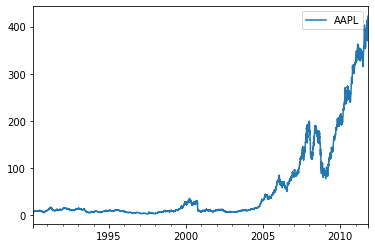

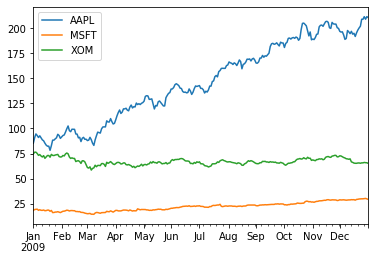

In [412]:
close_px[['AAPL']].plot()
close_px.loc['2009'].plot()

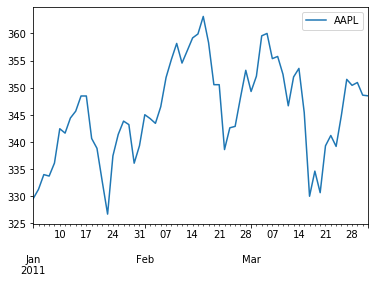

In [413]:
close_px[['AAPL']].loc['01-2011':'03-2011'].plot()

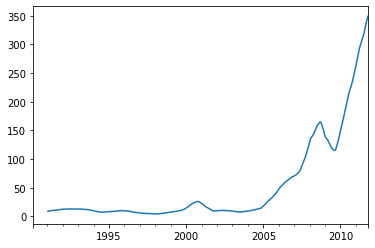

In [414]:
#移动窗口函数
Series.rolling(close_px.AAPL,250).mean().plot()

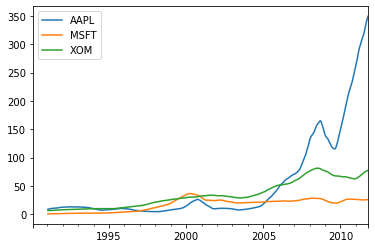

In [415]:
#另一种方式
close_px.rolling(250).mean().plot()